In [1]:
pip install pandas matplotlib openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install --upgrade jupyter ipython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
dt = pd.read_excel('f35_01_2022.xlsx') # i use here latest available UZ dataset, because others are not shown during war (fresher ones)

In [4]:
dt.head() # just to show the data sample

,nomer_poizda_vnutrishnoderzhavnyi,vyd_spoluchennia,data_vidpravlennia_poizda,stantsiia_vidpravlennia,stantsiia_pryznachennia,typ_vahona,typ_proizdnoho_dokumenta,kilkist_pasazhyriv
0,001Л,Внутрішньодержавне,2022-01-02,ІВАНО-ФРАНКІВСЬК,ІЗЮМ,Купейний ...,Повний,2
1,001Л,Внутрішньодержавне,2022-01-02,ІВАНО-ФРАНКІВСЬК,КИЇВ-ПАСАЖИРСЬКИЙ,Купейний ...,Повний,19
2,001Л,Внутрішньодержавне,2022-01-02,ІВАНО-ФРАНКІВСЬК,КИЇВ-ПАСАЖИРСЬКИЙ,Купейний ...,Дитячий,1
3,001Л,Внутрішньодержавне,2022-01-02,ІВАНО-ФРАНКІВСЬК,КИЇВ-ПАСАЖИРСЬКИЙ,Люкс ...,Повний,8
4,001Л,Внутрішньодержавне,2022-01-02,ІВАНО-ФРАНКІВСЬК,КОСТЯНТИНІВКА,Купейний ...,Повний,8


In [5]:
print(dt['vyd_spoluchennia'].unique()) # show available train "types" for further visualizations

['Внутрішньодержавне' 'Міжнародне']


In [6]:
print(dt['nomer_poizda_vnutrishnoderzhavnyi'].unique()) # same for further purposes

['001Л ' '002Д ' '003Л ' '004П ' '006Д ' '006Л ' '007К ' '007О ' '007Ш '
 '008Л ' '008О ' '008Ш ' '010Д ' '010К ' '012К ' '012Л ' '012П ' '012Ш '
 '013К ' '013Л ' '015О ' '016Л ' '017К ' '017Л ' '017О ' '017Ш ' '020Д '
 '020К ' '020Л ' '020П ' '021К ' '021О ' '022Л ' '022Ш ' '025Л ' '026К '
 '026О ' '026Ш ' '029К ' '029Л ' '029У ' '031Л ' '032Ш ' '033К ' '034О '
 '036Л ' '036Ш ' '037Л ' '037Ш ' '038К ' '038Л ' '038П ' '038Ш ' '041П '
 '042Л ' '043К ' '043Л ' '043Ш ' '044К ' '045Л ' '046Д ' '049К ' '050Л '
 '052К ' '053П ' '054Ш ' '055К ' '055О ' '056Л ' '056Ш ' '057К ' '057О '
 '058В ' '058Л ' '058О ' '059К ' '060Л ' '061Ч ' '063О ' '064К ' '067К '
 '068Д ' '068Л ' '068Ш ' '070Д ' '070Л ' '071В ' '072К ' '072П ' '076К '
 '076Л ' '076П ' '077О ' '078Д ' '078Л ' '078П ' '078Ш ' '079П ' '080К '
 '081А ' '081К ' '081Л ' '081О ' '082В ' '082И ' '082П ' '084Д ' '084К '
 '084О ' '084П ' '086Л ' '086П ' '086У ' '086Ч ' '088Л ' '088П ' '089Л '
 '090Д ' '090Л ' '090П ' '090Ш ' '091К ' '092А ' '0

In [7]:
print(dt['typ_vahona'].unique()) # same

['Купейний                                                                     '
 'Люкс                                                                         '
 'Плацкартний                                                                  '
 'Сидячий                                                                      '
 'Загальний                                                                    '
 "М'який                                                                       "]


As we see, 'typ_vahona' and 'nomer_poizda_vnutrishnoderzhavnyi' for some reason have trailing whitespaces, so lower i will perform data cleaning

In [8]:
dt['typ_vahona'] = dt['typ_vahona'].str.strip()
print(dt['typ_vahona'].unique())

dt['nomer_poizda_vnutrishnoderzhavnyi'] = dt['nomer_poizda_vnutrishnoderzhavnyi'].str.strip()
print(dt['nomer_poizda_vnutrishnoderzhavnyi'].unique())

['Купейний' 'Люкс' 'Плацкартний' 'Сидячий' 'Загальний' "М'який"]
['001Л' '002Д' '003Л' '004П' '006Д' '006Л' '007К' '007О' '007Ш' '008Л'
 '008О' '008Ш' '010Д' '010К' '012К' '012Л' '012П' '012Ш' '013К' '013Л'
 '015О' '016Л' '017К' '017Л' '017О' '017Ш' '020Д' '020К' '020Л' '020П'
 '021К' '021О' '022Л' '022Ш' '025Л' '026К' '026О' '026Ш' '029К' '029Л'
 '029У' '031Л' '032Ш' '033К' '034О' '036Л' '036Ш' '037Л' '037Ш' '038К'
 '038Л' '038П' '038Ш' '041П' '042Л' '043К' '043Л' '043Ш' '044К' '045Л'
 '046Д' '049К' '050Л' '052К' '053П' '054Ш' '055К' '055О' '056Л' '056Ш'
 '057К' '057О' '058В' '058Л' '058О' '059К' '060Л' '061Ч' '063О' '064К'
 '067К' '068Д' '068Л' '068Ш' '070Д' '070Л' '071В' '072К' '072П' '076К'
 '076Л' '076П' '077О' '078Д' '078Л' '078П' '078Ш' '079П' '080К' '081А'
 '081К' '081Л' '081О' '082В' '082И' '082П' '084Д' '084К' '084О' '084П'
 '086Л' '086П' '086У' '086Ч' '088Л' '088П' '089Л' '090Д' '090Л' '090П'
 '090Ш' '091К' '092А' '092Д' '092Л' '092Ш' '095К' '095О' '096Л' '096Ш'
 '097К' '098

In [9]:
dt.info() # brief info on dataset + count of non-null elements

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380752 entries, 0 to 380751
Data columns (total 8 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   nomer_poizda_vnutrishnoderzhavnyi  380752 non-null  object
 1   vyd_spoluchennia                   380752 non-null  object
 2   data_vidpravlennia_poizda          380752 non-null  object
 3   stantsiia_vidpravlennia            380752 non-null  object
 4   stantsiia_pryznachennia            380752 non-null  object
 5   typ_vahona                         380752 non-null  object
 6   typ_proizdnoho_dokumenta           380752 non-null  object
 7   kilkist_pasazhyriv                 380752 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 23.2+ MB


In [10]:
print(dt.isnull().sum()) # additional check if there are null elements in dataset

nomer_poizda_vnutrishnoderzhavnyi    0
vyd_spoluchennia                     0
data_vidpravlennia_poizda            0
stantsiia_vidpravlennia              0
stantsiia_pryznachennia              0
typ_vahona                           0
typ_proizdnoho_dokumenta             0
kilkist_pasazhyriv                   0
dtype: int64


In [11]:
dupl = dt[dt.duplicated()] # check for duplicates in dataset
if dupl.empty:
    print("There are no duplicates in dataset")

There are no duplicates in dataset


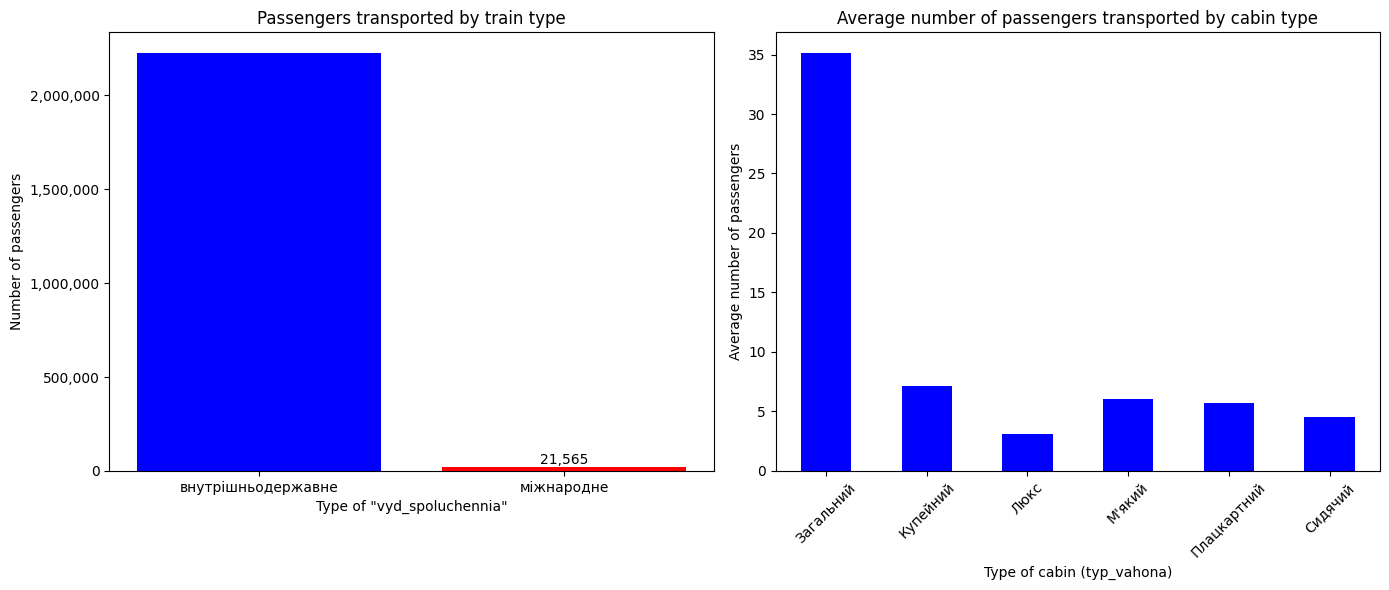

In [21]:
import matplotlib.ticker as ticker

domestic = dt[dt['vyd_spoluchennia'] == 'Внутрішньодержавне']
international = dt[dt['vyd_spoluchennia'] == 'Міжнародне']

# amount of psngrs for each train type
domestic_psngrs = domestic['kilkist_pasazhyriv'].sum()
international_psngrs = international['kilkist_pasazhyriv'].sum()

plt.figure(figsize=(14, 6))

# total psngrs bar comparison
plt.subplot(121)
bars = plt.bar(['внутрішньодержавне', 'міжнародне'], [domestic_psngrs, international_psngrs], color=['blue', 'red'])
plt.title('Passengers transported by train type')
plt.xlabel('Type of "vyd_spoluchennia"')
plt.ylabel('Number of passengers')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))) # here i format the number of passengers in human readable form
plt.text(1, international_psngrs, f'{international_psngrs:,}', ha='center', va='bottom') # just to show how many on mizhnarodne because it has small value

# below i calculate the average amount of passengers transported by each cabin type
avg_psngrs = dt.groupby('typ_vahona')['kilkist_pasazhyriv'].mean()

plt.subplot(122)
avg_psngrs.plot(kind='bar', color='blue')
plt.title('Average number of passengers transported by cabin type')
plt.xlabel('Type of cabin (typ_vahona)')
plt.ylabel('Average number of passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

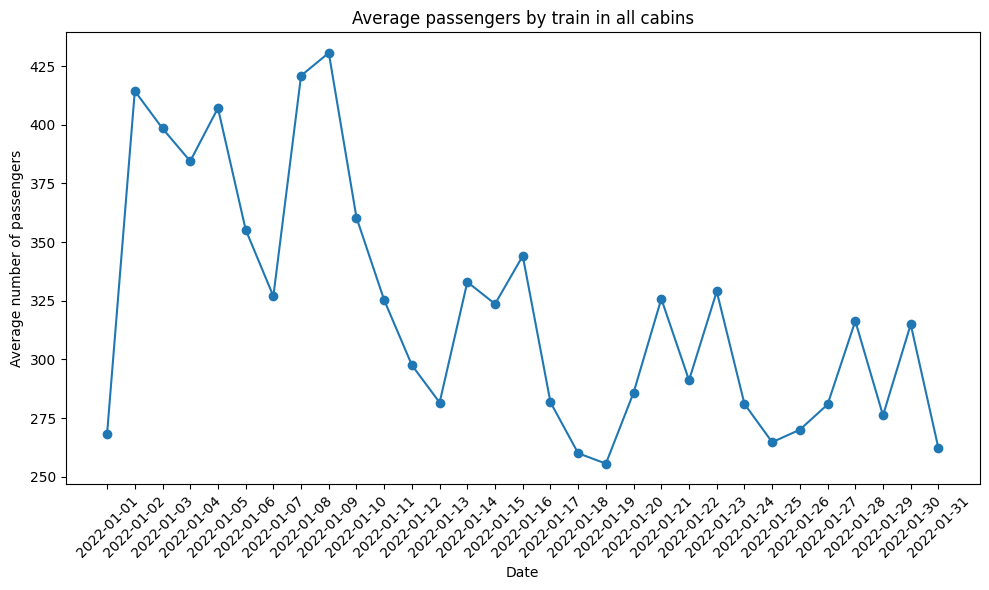

In [24]:
psngrs_per_train_per_date = dt.groupby(['data_vidpravlennia_poizda', 'nomer_poizda_vnutrishnoderzhavnyi'])['kilkist_pasazhyriv'].sum().reset_index() #total sum of passengers by trains on each date

# here i calculate how many passengers on average transported on each date from dataset
average_psngrs_by_date = psngrs_per_train_per_date.groupby('data_vidpravlennia_poizda')['kilkist_pasazhyriv'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_psngrs_by_date.index, average_psngrs_by_date.values, marker='o', linestyle='-')
plt.title('Average passengers by train in all cabins')
plt.xlabel('Date')
plt.ylabel('Average number of passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
dt['data_vidpravlennia_poizda'] = pd.to_datetime(dt['data_vidpravlennia_poizda']) #normalize timestamp to datetime format
trains_1 = dt[dt['data_vidpravlennia_poizda'].dt.strftime('%m-%d') == '01-01'] # select all trains on 01-01

# print all trains departed on 01-01
print(trains_1[['nomer_poizda_vnutrishnoderzhavnyi', 'data_vidpravlennia_poizda']])

# calculate and print how many of them are unique
unique_t = trains_1['nomer_poizda_vnutrishnoderzhavnyi'].nunique()
print(f"Number of unique trains on 01-01: {unique_t}")
# calculate average per all trains
avg_p_trains = trains_1.groupby('nomer_poizda_vnutrishnoderzhavnyi')['kilkist_pasazhyriv'].sum().mean()
print(f"Average per all trains on 01-01: {avg_p_trains}")

       nomer_poizda_vnutrishnoderzhavnyi data_vidpravlennia_poizda
4977                                006Л                2022-01-01
4978                                006Л                2022-01-01
4979                                006Л                2022-01-01
4980                                006Л                2022-01-01
4981                                006Л                2022-01-01
...                                  ...                       ...
378327                              896П                2022-01-01
378328                              896П                2022-01-01
380641                              961О                2022-01-01
380642                              961О                2022-01-01
380700                              963О                2022-01-01

[10172 rows x 2 columns]
Number of unique trains on 01-01: 200
Average per all trains on 01-01: 268.445


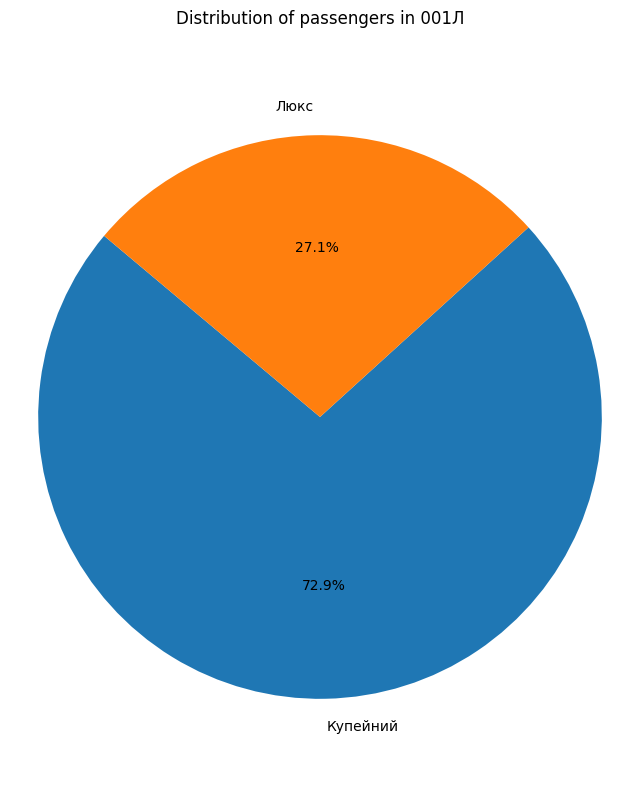

In [31]:
# lets check distribution of passengers inside 001l train by cabins and make pie chart to show it
t001l = dt[dt['nomer_poizda_vnutrishnoderzhavnyi'] == '001Л']

# avg by cabins
avg_psngrs = t001l.groupby('typ_vahona')['kilkist_pasazhyriv'].mean()

if len(avg_psngrs) > 0:
    plt.figure(figsize=(8, 10))
    plt.pie(avg_psngrs, labels=avg_psngrs.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of passengers in 001Л')
    plt.axis('equal')
    plt.show()
else:
    print("No data for train 001Л")


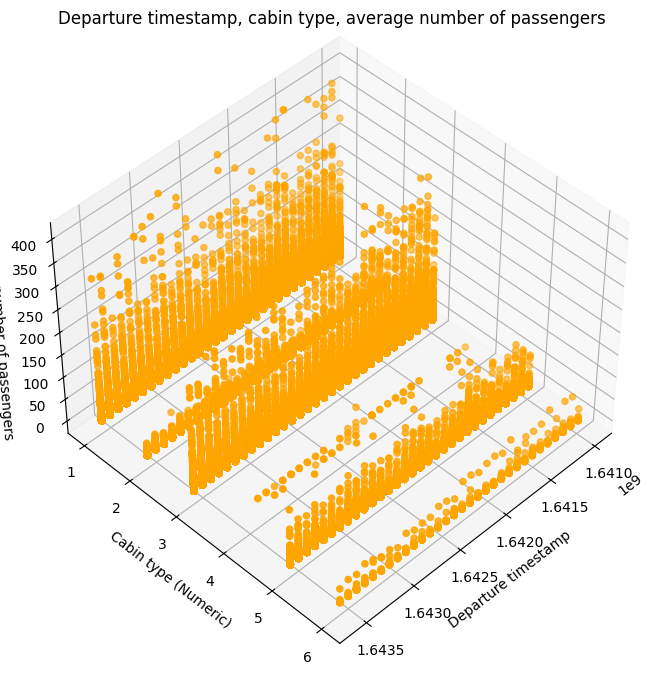

In [38]:
# here i plot 3d graph of data/type of cabin/avg number of psngrs
dt['timestamp'] = dt['data_vidpravlennia_poizda'].astype('int64') // 10**9  # date to timestamp (because date is not numeric and cant be plotted along with numerical values)

# here mapping cabins to numerical values for same concerns
type_mapping = {'Купейний': 1, 'Люкс': 2, 'Плацкартний': 3, 'Загальний': 4, 'Сидячий': 5, "М'який": 6}
dt['typ_vahona_numeric'] = dt['typ_vahona'].map(type_mapping)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dt[dt['kilkist_pasazhyriv'].notnull()]['timestamp'], dt[dt['kilkist_pasazhyriv'].notnull()]['typ_vahona_numeric'], dt[dt['kilkist_pasazhyriv'].notnull()]['kilkist_pasazhyriv'], c='orange', marker='o')

ax.set_xlabel('Departure timestamp')
ax.set_ylabel('Cabin type (Numeric)')
ax.set_zlabel('Average number of passengers')

plt.title('Departure timestamp, cabin type, average number of passengers')

ax.view_init(azim=45, elev=45) # rotating a bit to view from top

plt.show()
